In [100]:
import pandas as pd

In [101]:
df = pd.read_csv("data/GSAF5.csv",encoding = "ISO-8859-1")
df.shape

(5992, 24)

In [102]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [103]:
# remmoving usless columns
df.drop(['Age','Case Number','href formula','Unnamed: 22','Unnamed: 23','original order','href','pdf','Case Number.1','Case Number.2','Area','Name','Sex ','Injury','Date','Time','Species ','Investigator or Source'],axis=1, inplace=True)

In [104]:
# check the mising value in the dataset
df.isna().sum()

Year             0
Type             0
Country         43
Location       496
Activity       527
Fatal (Y/N)     19
dtype: int64

In [105]:
# cleaning data process
# check the list of column containing null value and remove all rows of those columns
null_df = df.isna().sum()
drop_cols_names = null_df[null_df>0].index.values
list_columns = [i for i in drop_cols_names]
list_columns
# drop all nan values in the data set 
df.dropna(subset=list_columns,inplace=True)

In [106]:
df.shape

(5032, 6)

In [107]:
# preparing fatal column
# rename the column Fatal (Y/N)
df.rename(columns={'Fatal (Y/N)':'Fatal'},inplace=True)
# check different value of fatal column
df.Fatal.unique()
# delete all rows that fatal equal UNKNOWN
df_index = df[df['Fatal']=='UNKNOWN'].index
df.drop(df_index,inplace=True)

df.Fatal = df.Fatal.str.replace(' N','N')
# create dummies from fatalities datas
df = pd.get_dummies(df,columns=['Fatal'])

In [108]:
df.head()

,Year,Type,Country,Location,Activity,Fatal_N,Fatal_Y,Fatal_n
0,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,1,0,0
1,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,1,0,0
2,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,1,0,0
3,2016,Unprovoked,AUSTRALIA,Thirteenth Beach,Surfing,1,0,0
4,2016,Unprovoked,AUSTRALIA,Bells Beach,Surfing,1,0,0


In [109]:
# analyze to determine the most dangerous beach in selectd year
grouped = df.groupby(['Location','Country'])
fatality = grouped.Fatal_Y.sum()
# returned value mortality is a series
fatality = fatality.to_frame(name='fatalities')


Fatality=pd.DataFrame()
Fatality['Location']= [i for i in fatality.index]
Fatality['fatalities']= fatality.values
dangerous = Fatality.sort_values('fatalities', ascending=False).head(10)

In [110]:
dangerous

,Location,fatalities
3602,"(Xai Xai, MOZAMBIQUE)",6
485,"(Boa Viagem, Recife, BRAZIL)",6
204,"(Ahvaz, on the Karun River, IRAN)",5
1219,"(Havana Harbor, CUBA)",5
2133,"(North Beach, Durban, SOUTH AFRICA)",5
2818,"(Ross River, Townsville, AUSTRALIA)",5
484,"(Boa Viagem Beach, Recife, BRAZIL)",4
685,"(Charleston Harbor, Charleston County, USA)",4
2184,"(Noumea, NEW CALEDONIA)",4
2532,"(Pensacola Bay, Escambia County, USA)",4


Text(0.5, 1.0, 'The most 10 dangerous beachs by number od death')

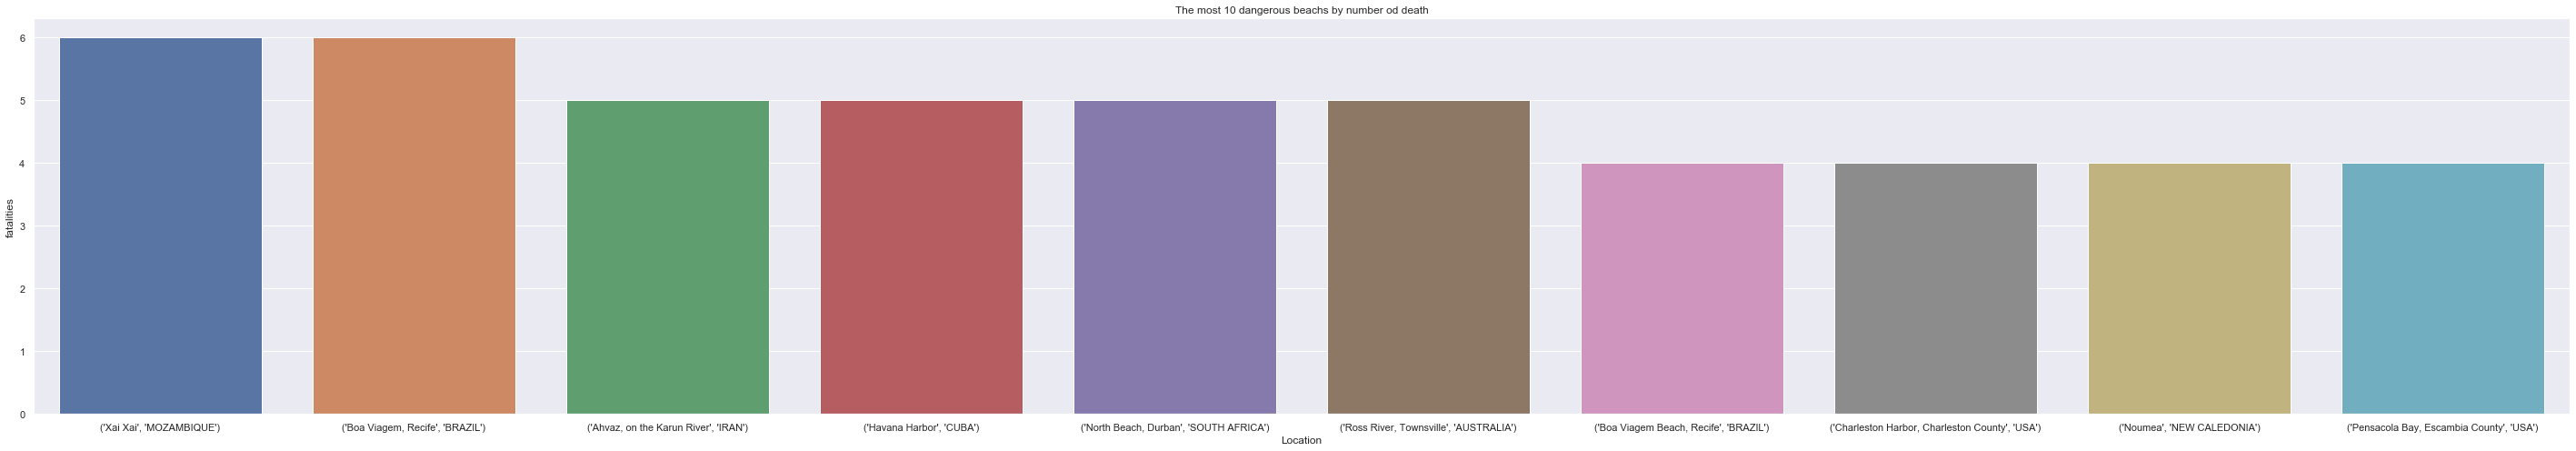

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
global year
fig,ax=plt.subplots(figsize=(50,8))
barchart=sns.barplot(data=dangerous, x='Location',y='fatalities')
plt.title("The most 10 dangerous beachs by number od death")

In [112]:
fig=barchart.get_figure()
fig.savefig("Most dangerous beachs in the word.png")
    